In [251]:
import yfinance as yf
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

### 1. Собрать данные по дневным ценам активов (акций) и дневным объемам продаж на заданном фондовом рынке за указанный период (1 год, примерно 250 наблюдений). Добавить (если нет) данные по индексу рынка.

In [252]:
data = pd.read_csv('nyse_data.csv')
data = data.drop(['Last Sale', 'Net Change', '% Change', 'Market Cap', 'IPO Year', 'Volume'], axis = 1)
data = data.dropna().reset_index().drop(['index'], axis = 1)
data

,Symbol,Name,Country,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,United States,Industrials,Electrical Products
1,AA,Alcoa Corporation Common Stock,United States,Industrials,Aluminum
2,AAN,Aarons Holdings Company Inc. Common Stock,United States,Consumer Discretionary,Diversified Commercial Services
3,AAP,Advance Auto Parts Inc.,United States,Consumer Discretionary,Auto & Home Supply Stores
4,AAT,American Assets Trust Inc. Common Stock,United States,Real Estate,Real Estate Investment Trusts
...,...,...,...,...,...
2154,ZTR,Virtus Total Return Fund Inc.,United States,Finance,Investment Managers
2155,ZTS,Zoetis Inc. Class A Common Stock,United States,Health Care,Biotechnology: Pharmaceutical Preparations
2156,ZUO,Zuora Inc. Class A Common Stock,United States,Technology,EDP Services
2157,ZVIA,Zevia PBC Class A Common Stock,United States,Consumer Staples,Beverages (Production/Distribution)


In [253]:
start = '2018-01-01'
end = '2018-12-31'
stocks = dict()
symbols = list(data['Symbol'])
stock_data = yf.download(symbols, start=start, end=end).dropna(axis = 1).drop(columns = ['Adj Close','High','Low','Open'])
stock_data

[*********************100%***********************]  2159 of 2159 completed

326 Failed downloads:
- EE: Data doesn't exist for startDate = 1514782800, endDate = 1546232400
- UZF: Data doesn't exist for startDate = 1514782800, endDate = 1546232400
- MIR: Data doesn't exist for startDate = 1514782800, endDate = 1546232400
- MGRD: Data doesn't exist for startDate = 1514782800, endDate = 1546232400
- WRBY: Data doesn't exist for startDate = 1514782800, endDate = 1546232400
- SLQT: Data doesn't exist for startDate = 1514782800, endDate = 1546232400
- AMPS: Data doesn't exist for startDate = 1514782800, endDate = 1546232400
- DTM: Data doesn't exist for startDate = 1514782800, endDate = 1546232400
- WBX: Data doesn't exist for startDate = 1514782800, endDate = 1546232400
- ELPC: Data doesn't exist for startDate = 1514782800, endDate = 1546232400
- KORE: Data doesn't exist for startDate = 1514782800, endDate = 1546232400
- CARR: Data doesn't exist for startDate = 1514782800, endDate = 1546232

Close                                               \
                    A         AA         AAP        AAT         AB   
Date                                                                 
2018-01-02  67.599998  55.169998  106.089996  38.160000  25.200001   
2018-01-03  69.320000  54.500000  107.050003  37.820000  25.450001   
2018-01-04  68.800003  54.700001  111.000000  37.119999  25.850000   
2018-01-05  69.900002  54.090000  112.180000  37.139999  26.200001   
2018-01-08  70.050003  55.000000  111.389999  37.220001  26.700001   
...               ...        ...         ...        ...        ...   
2018-12-21  63.290001  26.389999  151.410004  40.209999  24.290001   
2018-12-24  62.669998  25.150000  148.919998  38.560001  23.680000   
2018-12-26  65.540001  27.139999  155.029999  39.950001  25.680000   
2018-12-27  66.480003  27.160000  154.690002  39.959999  26.059999   
2018-12-28  65.959999  26.600000  155.460007  40.070000  26.820000   

                                                           ...   Volume  \
                  ABBV  ABEV        ABG        ABM    ABR  ...     YEXT   
Date                                                       ...            
2018-01-02   98.410004  6.61  63.250000  37.750000   8.64  ...   484100   
2018-01-03   99.949997  6.65  63.500000  37.720001   8.57  ...   499000   
2018-01-04   99.379997  6.64  64.099998  38.330002   8.55  ...   444800   
2018-01-05  101.110001  6.67  66.550003  39.020000   8.56  ...   268900   
2018-01-08   99.489998  6.62  70.800003  39.549999   8.66  ...   351200   
...                ...   ...        ...        ...    ...  ...      ...   
2018-12-21   84.919998  3.84  62.500000  30.190001   9.96  ...  1743000   
2018-12-24   84.160004  3.82  62.299999  28.780001   9.78  ...   234900   
2018-12-26   89.040001  3.90  64.860001  31.100000  10.27  ...   483600   
2018-12-27   89.910004  3.91  64.800003  30.809999  10.22  ...  1055100   
2018-12-28   91.120003  3.90  65.709999  31.090000  10.24  ...   524700   

                                                                         \
                YPF     YRD      YUM     YUMC      ZBH      ZTO     ZTR   
Date                                                                      
2018-01-02  1451400  459500  1747800  1373300  1818259  4857000  116400   
2018-01-03  1437900  512000  2554900  2435400  1368664  2629800  119500   
2018-01-04  1281200  483200  1971200  2186300  1105396  2320200   78300   
2018-01-05  1550500  427200  1927100  1895900  1095302  1770800   87900   
2018-01-08  1117300  576800  1599400  1442800  1286985  1337700   64400   
...             ...     ...      ...      ...      ...      ...     ...   
2018-12-21  1034000  840000  5364600  2094800  3159113  1342700  186300   
2018-12-24   472600  243800  1806000   825000   959548   418000  122100   
2018-12-26  1031400  416200  2030200  1303000  1667776   658300  131300   
2018-12-27   886200  415000  2081600   994100  1626267  1798300  169700   
2018-12-28   816200  277700  1699500  1199900  1915800  1864100  137700   

                              
                ZTS      ZWS  
Date                          
2018-01-02  2135600   502700  
2018-01-03  2328200   787800  
2018-01-04  2534000   634000  
2018-01-05  2166100   850200  
2018-01-08  3631400  1721800  
...             ...      ...  
2018-12-21  4091700  1001500  
2018-12-24  1551400   278100  
2018-12-26  1869700   737000  
2018-12-27  2244700   482500  
2018-12-28  1797300   432900  

[250 rows x 3546 columns]

Всего были собраны акции 1773 компаний на Нью-Йоркской фондовой бирже

In [254]:
nyse_index = yf.download('^NYA', start=start, end=end)
nyse_index = nyse_index.drop(columns = ['Open', 'High', 'Low', 'Adj Close'])

[*********************100%***********************]  1 of 1 completed


NYSE Composite (^ NYA) - это индекс фондового рынка, охватывающий все обыкновенные акции, котирующиеся на Нью-Йоркской фондовой бирже

### 2. Преобразовать данные по ценам в данные по доходностям (используйте логарифмическую доходность). Вычислите оценки ожидаемых доходностей и стандартных отклонений и постройте «карту» активов в системе координат (σ, E). 

In [255]:
log_profitability_stocks = stock_data['Close'].copy()
for symbol in stock_data['Close'].columns:
    log_profitability_stocks[symbol] = np.log(stock_data['Close'][symbol] / stock_data['Close'][symbol].shift(1))
log_profitability_stocks = log_profitability_stocks.drop(index = log_profitability_stocks.index[0])
log_profitability_stocks

,A,AA,AAP,AAT,AB,ABBV,ABEV,ABG,ABM,ABR,...,YEXT,YPF,YRD,YUM,YUMC,ZBH,ZTO,ZTR,ZTS,ZWS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.025125,-0.012219,0.009008,-0.008950,0.009872,0.015528,0.006033,0.003945,-0.000795,-0.008135,...,-0.008475,-0.001693,-0.012052,-0.000858,0.038861,0.006908,-0.006722,0.007413,0.004588,0.009195
2018-01-04,-0.007530,0.003663,0.036234,-0.018682,0.015595,-0.005719,-0.001505,0.009404,0.016042,-0.002336,...,-0.004264,-0.013223,-0.033968,0.010129,0.006136,-0.001442,-0.011718,-0.010394,0.005946,0.004566
2018-01-05,0.015862,-0.011214,0.010575,0.000539,0.013449,0.017258,0.004508,0.037509,0.017841,0.001169,...,-0.009446,-0.012095,-0.017315,0.005811,0.005865,0.009892,-0.004352,0.000000,0.011379,-0.000380
2018-01-08,0.002144,0.016684,-0.007067,0.002152,0.018904,-0.016152,-0.007525,0.061905,0.013491,0.011614,...,-0.012153,0.031654,-0.062123,0.001689,-0.001639,0.001903,-0.022048,-0.004488,0.011924,0.050723
2018-01-09,0.024257,-0.014652,-0.008113,-0.017891,0.029522,0.007510,-0.006061,0.003525,-0.001265,-0.011614,...,-0.003500,0.000421,0.018414,-0.002655,0.014191,-0.016214,0.002545,0.007468,0.011651,-0.000722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.029579,-0.035000,-0.007173,-0.003724,-0.026809,-0.005285,-0.020619,-0.030878,-0.028732,-0.013958,...,-0.074483,-0.010240,-0.144581,0.011640,-0.024496,-0.023764,0.029301,-0.014003,-0.009019,-0.029801
2018-12-24,-0.009845,-0.048127,-0.016582,-0.041900,-0.025434,-0.008990,-0.005222,-0.003205,-0.047830,-0.018238,...,0.008969,-0.025663,0.014389,-0.012789,0.000310,-0.021872,0.003759,-0.013010,-0.029823,-0.035314
2018-12-26,0.044778,0.076151,0.040209,0.035413,0.081082,0.056366,0.020726,0.040270,0.077527,0.048888,...,0.048648,0.064488,-0.013423,0.033561,0.021157,0.048090,0.027145,0.035091,0.044890,0.052951


In [256]:
names = list(log_profitability_stocks.columns)
stock_prop = pd.DataFrame(columns = ['E','σ'], index = names)
for i in range(len(names)):
    E = log_profitability_stocks[names[i]].mean()
    σ = log_profitability_stocks[names[i]].std()
    stock_prop.iloc[i,0] = E
    stock_prop.iloc[i,1] = σ
stock_prop

,E,σ
A,-0.000099,0.017164
AA,-0.00293,0.028805
AAP,0.001535,0.019775
AAT,0.000196,0.013132
AB,0.00025,0.016315
...,...,...
ZBH,-0.000761,0.014692
ZTO,-0.000104,0.02425
ZTR,-0.001701,0.011032
ZTS,0.000655,0.014814


Text(0.5, 1.0, 'Карта активов: σ от E')

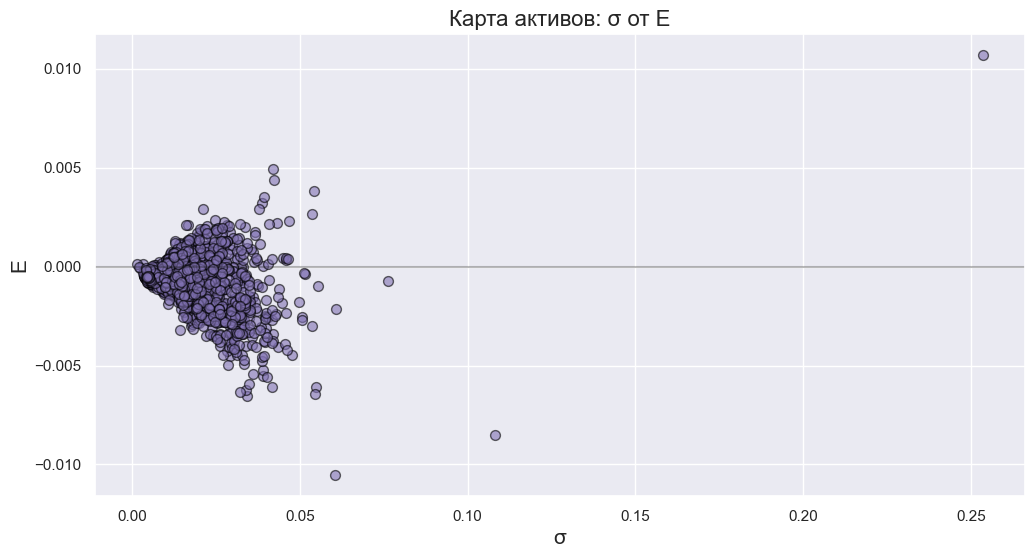

In [257]:
sns.set()
plt.figure(figsize=(12,6))

plt.axhline(y=0, color='k', alpha=0.3)
plt.scatter(stock_prop['σ'], stock_prop['E'], s=50, c='m',
            edgecolor='black', alpha=0.6)

plt.xlabel('σ', size=15)
plt.ylabel('E', size=15)
plt.title("Карта активов: σ от E", size=16)

### 3. Рассмотрите портфель с равными долями капитала и отметьте его на карте активов в системе координат   (σ, E).  Дайте характеристику этому портфелю

In [258]:
balanced_port_E = log_profitability_stocks.mean(axis = 1).mean()
balanced_port_σ = log_profitability_stocks.mean(axis = 1).std()

Text(0.5, 1.0, 'Карта активов: σ от E')

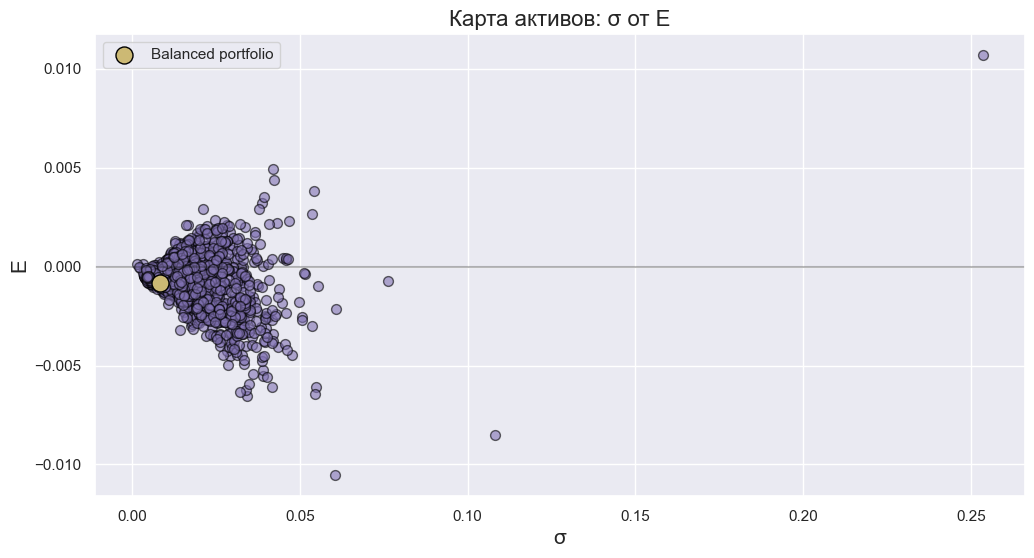

In [259]:
plt.figure(figsize=(12,6))

plt.axhline(y=0, color='k', alpha=0.3)
plt.scatter(stock_prop['σ'], stock_prop['E'], s=50, c='m',
            edgecolor='black', alpha=0.6)
plt.scatter(balanced_port_σ, balanced_port_E, s=150, c='y',
            edgecolor='black', label="Balanced portfolio")
plt.legend()

plt.xlabel('σ', size=15)
plt.ylabel('E', size=15)
plt.title("Карта активов: σ от E", size=16)

Сектора экономики, представленные в портфеле

In [260]:
print(*data['Sector'].unique(), sep=', ')
print('Count unique Sectors:', len(data['Sector'].unique())) 

Industrials, Consumer Discretionary, Real Estate, Finance, Health Care, Consumer Staples, Utilities, Basic Materials, Technology, Miscellaneous, Energy, Telecommunications
Count unique Sectors: 12


Страны, представленные в портфеле

In [261]:
print(data['Country'].unique())
print('Count unique Countries:', len(data['Country'].unique()))

['United States' 'Brazil' 'Ireland' 'Netherlands' 'Canada' 'Bermuda'
 'Luxembourg' 'Switzerland' 'Sweden' 'Mexico' 'United Kingdom' 'Argentina'
 'Taiwan' 'China' 'South Africa' 'Peru' 'Spain' 'Chile' 'Cayman Islands'
 'Australia' 'Panama' 'Belgium' 'Colombia' 'Greece' 'Hong Kong'
 'Singapore' 'Germany' 'Jersey' 'Italy' 'Norway' 'Puerto Rico' 'Guernsey'
 'India' 'Japan' 'Israel' 'South Korea' 'Isle of Man' 'Finland' 'Denmark'
 'France' 'Philippines' 'Monaco' 'Turkey' 'Indonesia'
 'United Arab Emirates']
Count unique Countries: 45


Портфель с равными долями капитала представляет собой среднеарифметическое значение по доходностям всех компаний, взятых в равном объёме. Отметим, что средняя доходность отрицательна, что говорит о снижении цен на акции на Нью-Йоркской фондовой бирже за 2018 год. Также заметим, что дисперсия близка к нулевой, так как компании, собранные в портфеле, представляют разные сектора экономики (12 разных секторов) и разные страны (всего 45 стран), что способствует снижению риска.

### 4. Рассмотрите индекс рынка и отметьте его на карте активов в системе координат   (σ,E). Дайте характеристику индексу рынка.  

In [262]:
nyse_index

,Close,Volume
Date,,
2018-01-02,12902.719727,3397430000
2018-01-03,12957.280273,3544030000
2018-01-04,13028.459961,3697340000
2018-01-05,13103.230469,3239280000
2018-01-08,13114.349609,3246160000
...,...,...
2018-12-21,11036.839844,7657890000
2018-12-24,10769.830078,2613670000
2018-12-26,11204.089844,4249740000


In [263]:
log_profitability_nyse_index = nyse_index['Close'].copy()
for j in range(stock_data['Close'].shape[0]):
    log_profitability_nyse_index[j] = math.log(nyse_index['Close'][j]/nyse_index['Close'][j-1])
log_profitability_nyse_index.iloc[0] = 0
log_profitability_nyse_index

Date
2018-01-02    0.000000
2018-01-03    0.004220
2018-01-04    0.005478
2018-01-05    0.005723
2018-01-08    0.000848
                ...   
2018-12-21   -0.016708
2018-12-24   -0.024490
2018-12-26    0.039530
2018-12-27    0.007223
2018-12-28    0.000500
Name: Close, Length: 250, dtype: float64

In [264]:
nyse_index_E = log_profitability_nyse_index.mean()
nyse_index_σ = log_profitability_nyse_index.std()

Text(0.5, 1.0, 'Карта активов: σ от E')

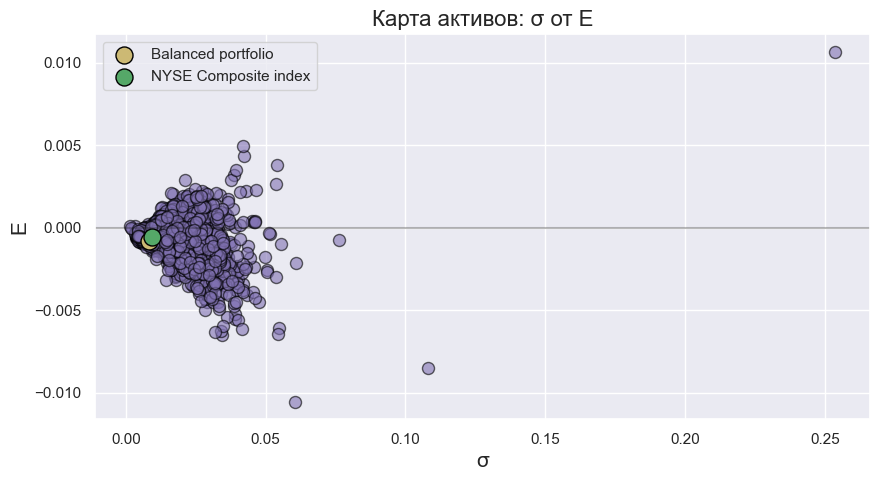

In [265]:
plt.figure(figsize=(10,5))

plt.axhline(y=0, color='k', alpha=0.3)
plt.scatter(stock_prop['σ'], stock_prop['E'], s=75, c='m',
            edgecolor='black', alpha=0.6)
plt.scatter(balanced_port_σ, balanced_port_E, s=150, c='y',
            edgecolor='black', label="Balanced portfolio")
plt.scatter(nyse_index_σ, nyse_index_E, s=150, c='g',
            edgecolor='black', label="NYSE Composite index")
plt.legend()
plt.xlabel('σ', size=15)
plt.ylabel('E', size=15)
plt.title("Карта активов: σ от E", size=16)

NYSE Composite, один из самых популярных фондовых индексов в мире, отражает изменения в курсе всех акций, торгуемых на Нью-Йоркской фондовой бирже. Он включает более 2000 крупнейших компаний, зарегистрированных как в США, так и в других странах, и общая их капитализация составляет более 20 триллионов долларов. <br> На карте активов можно заметить, что NYA имеет немного больший риск по сравнению с сбалансированным портфелем, и чуть более высокую доходность, однако они в целом имеют очень близкие значения, так как портфель и индекс содержат похожий набор компаний.

### 5. Задайте уровень риска и оцените VaR (Value at Risk = Сумма под Риском для случайных величин Потери = - Доходности) для активов вашего рынка. Какой из активов наиболее предпочтителен по этой характеристике?  Где он расположен на карте активов? Дайте характеристику VaR портфеля с равными долями и индекса рынка.

Найдём акции с лучшим значением VaR при уровнях значимости 0,9 и 0,95

Для вычисления VaR:

Отсортируем полученные доходности по возрастанию и вычислим 5% квантиль (или 10% в зависимости от уровня значимости)

In [266]:
confidence_level = [0.95, 0.90]

def calculate_VaR(returns, confidence_level):
    sorted_returns = np.sort(returns)
    percentile = np.percentile(sorted_returns, (1-confidence_level)*100)
    return -percentile

df_var_95 = {}
for col in log_profitability_stocks.columns:
    portfolio_returns = list(log_profitability_stocks[col])
    VaR = calculate_VaR(portfolio_returns, confidence_level[0])
    df_var_95.update({col : VaR})
    print(f"The VaR for {col} 95% confidence level is: {VaR}")

df_var_90 = {}
for col in log_profitability_stocks.columns:
    portfolio_returns = list(log_profitability_stocks[col])
    VaR = calculate_VaR(portfolio_returns, confidence_level[1])
    df_var_90.update({col : VaR})
    print(f"The VaR for {col} 90% confidence level is: {VaR}")

The VaR for A 95% confidence level is: 0.02576167506755872
The VaR for AA 95% confidence level is: 0.05492385150956714
The VaR for AAP 95% confidence level is: 0.03176397455962831
The VaR for AAT 95% confidence level is: 0.020453416846295328
The VaR for AB 95% confidence level is: 0.028495973673918967
The VaR for ABBV 95% confidence level is: 0.034671947241725794
The VaR for ABEV 95% confidence level is: 0.03301951626969737
The VaR for ABG 95% confidence level is: 0.028016866501455268
The VaR for ABM 95% confidence level is: 0.034214667719071806
The VaR for ABR 95% confidence level is: 0.01820385252946068
The VaR for ABT 95% confidence level is: 0.024157063878286363
The VaR for AC 95% confidence level is: 0.028751598295674377
The VaR for ACCO 95% confidence level is: 0.031073003723086995
The VaR for ACEL 95% confidence level is: 0.004017758147750423
The VaR for ACM 95% confidence level is: 0.02962179189097948
The VaR for ACN 95% confidence level is: 0.027400303472302722
The VaR for ACP

The VaR for TBI 95% confidence level is: 0.028981621202227206
The VaR for TCI 95% confidence level is: 0.057833168349685195
The VaR for TCS 95% confidence level is: 0.0467673990222221
The VaR for TD 95% confidence level is: 0.014932952998724538
The VaR for TDC 95% confidence level is: 0.033857311530436335
The VaR for TDF 95% confidence level is: 0.024300441960177027
The VaR for TDG 95% confidence level is: 0.0267974577295404
The VaR for TDOC 95% confidence level is: 0.05679258807580533
The VaR for TDS 95% confidence level is: 0.028963131834453367
The VaR for TDW 95% confidence level is: 0.041992009867750105
The VaR for TDY 95% confidence level is: 0.0249213694630393
The VaR for TEF 95% confidence level is: 0.02375405391662006
The VaR for TEI 95% confidence level is: 0.010393790700438403
The VaR for TEL 95% confidence level is: 0.029613925638649636
The VaR for TEO 95% confidence level is: 0.04390298469038928
The VaR for TEVA 95% confidence level is: 0.04309401294790312
The VaR for TEX 9

The VaR for PB 90% confidence level is: 0.018933415471966523
The VaR for PBA 90% confidence level is: 0.016871901877985977
The VaR for PBF 90% confidence level is: 0.032695361748679805
The VaR for PBH 90% confidence level is: 0.02650410089826007
The VaR for PBI 90% confidence level is: 0.03188225788134276
The VaR for PBR 90% confidence level is: 0.036453505825281736
The VaR for PBT 90% confidence level is: 0.018439967650131634
The VaR for PCF 90% confidence level is: 0.005556218487642728
The VaR for PCG 90% confidence level is: 0.023649452199170185
The VaR for PCK 90% confidence level is: 0.01004751543584188
The VaR for PCM 90% confidence level is: 0.012661616723119442
The VaR for PCN 90% confidence level is: 0.013120400054266962
The VaR for PCQ 90% confidence level is: 0.010235894282114515
The VaR for PDI 90% confidence level is: 0.00885315809718854
The VaR for PDM 90% confidence level is: 0.015631157015416428
The VaR for PDT 90% confidence level is: 0.010035488146724614
The VaR for P

In [267]:
df_var_90 = pd.DataFrame(df_var_90.items(), columns=['name', 'VaR']) #.drop(columns=['name']) , index=df_var_90.keys()
df_var_90.sort_values(by='VaR', ascending=True, inplace=True)
df_var_90 = df_var_90.reset_index().drop(columns='index')
df_var_90

,name,VaR
0,ODV,-0.000000
1,IVT,-0.000000
2,CTOS,0.001023
3,ARGD,0.001589
4,SPCE,0.002019
...,...,...
1768,KODK,0.061499
1769,LITB,0.063408
1770,BW,0.064799
1771,WTI,0.065526


In [268]:
df_var_95 = pd.DataFrame(df_var_95.items(), columns=['name', 'VaR']) #.drop(columns=['name']) , index=df_var_90.keys()
df_var_95.sort_values(by='VaR', ascending=True, inplace=True)
df_var_95 = df_var_95.reset_index().drop(columns='index')
df_var_95

,name,VaR
0,IVT,-0.000000
1,ODV,-0.000000
2,CTOS,0.002066
3,ARGD,0.002371
4,SPCE,0.003007
...,...,...
1768,YRD,0.083905
1769,CYH,0.085663
1770,LITB,0.087350
1771,BW,0.089324


In [269]:
df_bad = df_var_95[df_var_95.VaR <= 0]

bad = [df_bad.name[i] for i in range(len(df_bad.name))]
print(bad)

['IVT', 'ODV']


In [270]:
for i in range(len(bad)):
    print(f"{bad[i]} - {len(stock_data[stock_data.Volume[bad[i]] != 0])}")

IVT - 34
ODV - 3


Первые две компании при обоих уровнях занчимости имеют отрицательное значение VaR. Это связано с тем, что они торговались всего несколько дней в году. Анализировать их не имеет смысла, так что возьмем наилучшую компанию с положительным значением VaR.

In [271]:
df_var_90 = df_var_90[df_var_90.VaR >= 0.000001]
df_var_95 = df_var_95[df_var_95.VaR >= 0.000001]

In [272]:
best_comp_90 = df_var_90.iloc[0][0]
best_comp_95 = df_var_95.iloc[0][0]

if best_comp_95 != best_comp_90:
    print('best_comp_90:', best_comp_90)
    print('best_comp_95:',  best_comp_95)
else:
    print('best_comp:', best_comp_90)

best_comp = best_comp_95

best_comp: CTOS


Text(0.5, 1.0, 'Карта активов: σ от E')

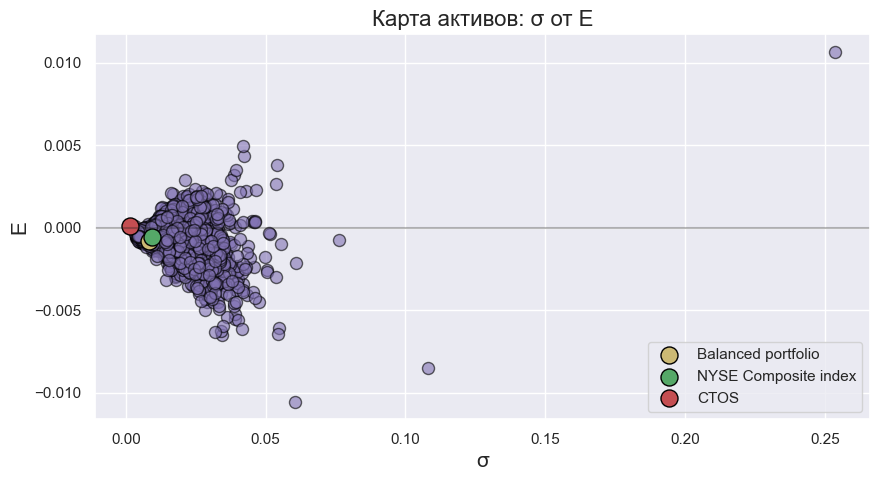

In [273]:
plt.figure(figsize=(10,5))

plt.axhline(y=0, color='k', alpha=0.3)
plt.scatter(stock_prop['σ'], stock_prop['E'], s=75, c='m',
            edgecolor='black', alpha=0.6)
plt.scatter(balanced_port_σ, balanced_port_E, s=150, c='y',
            edgecolor='black', label="Balanced portfolio")
plt.scatter(nyse_index_σ, nyse_index_E, s=150, c='g',
            edgecolor='black', label="NYSE Composite index")
plt.scatter(stock_prop.σ[best_comp], stock_prop.E[best_comp], s=150, c='r',
            edgecolor='black', label="CTOS")
plt.legend(loc = 'lower right')
plt.xlabel('σ', size=15)
plt.ylabel('E', size=15)
plt.title("Карта активов: σ от E", size=16)

Обратим внимание, что для обоих значений уровня значимости лучшей компанией будет Custom Truck One Source, которая предоставляет услуги по аренде специализированного оборудования для передачи и распределения электроэнергии, телекоммуникаций, железнодорожного транспорта и других отраслей, связанных с инфраструктурой, в Северной Америке.
Заметим, что дисперсия данной компаний, как и доходность очень близка к нулю, что видно карте активов

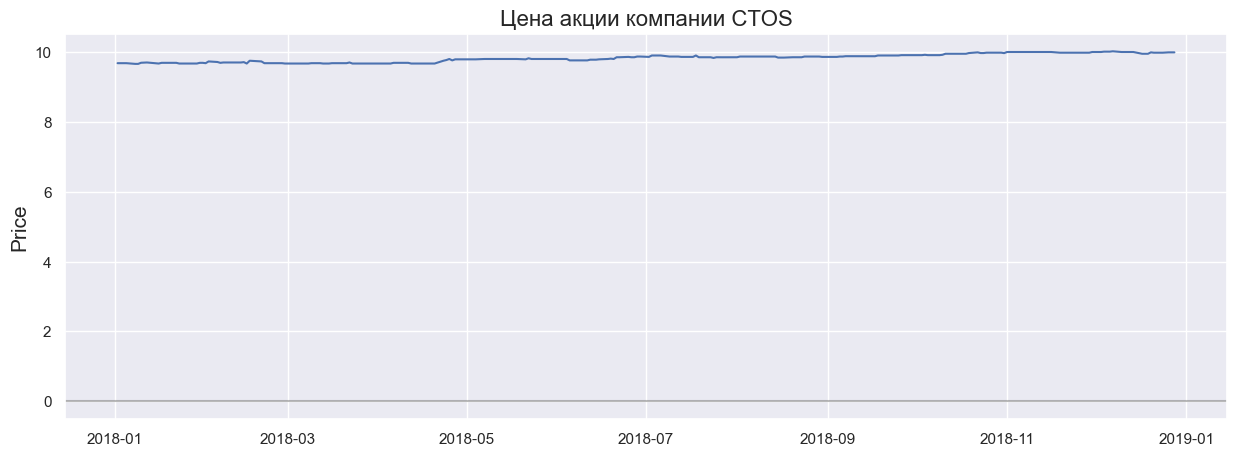

In [274]:
plt.figure(figsize=(15,5))
plt.axhline(y=0, color='k', alpha=0.3)
plt.plot(stock_data['Close'][best_comp])

plt.ylabel('Price', size=15)
plt.title(f"Цена акции компании {best_comp}", size=16)
pass

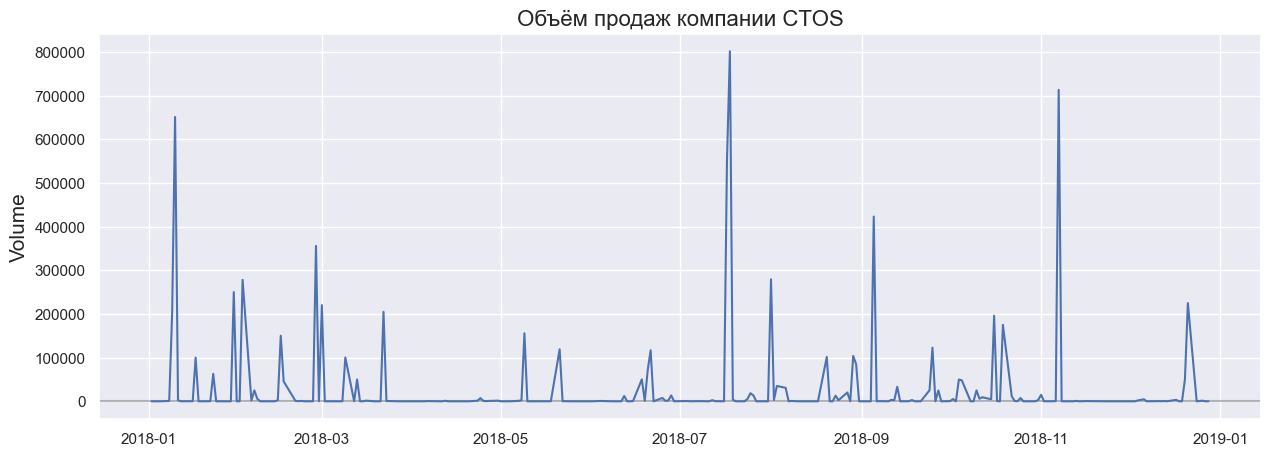

In [275]:
plt.figure(figsize=(15,5))
plt.axhline(y=0, color='k', alpha=0.3)
plt.plot(stock_data['Volume'][best_comp])

plt.ylabel('Volume', size=15)
plt.title(f"Объём продаж компании {best_comp}", size=16)
pass

Заметим, что цена данной акции в течении всего года была примерно на одном и том же уровне. Также большое влияние на значение VaR оказало то, что акции данной компании не торговались в течение некоторых периодов 2018 года

In [276]:
confidence_level = [0.95, 0.90]

var_balances_port_95 = calculate_VaR(log_profitability_stocks.mean(axis = 1), confidence_level[0])
var_balances_port_90 =  calculate_VaR(log_profitability_stocks.mean(axis = 1), confidence_level[1])

nyse_95 = calculate_VaR(log_profitability_nyse_index, confidence_level[0])
nyse_90 = calculate_VaR(log_profitability_nyse_index, confidence_level[1])

print(f"{var_balances_port_95} - VaR для сбалансированного портфеля")
print(f"{var_balances_port_90} - VaR для сбалансированного портфеля")
print()
print(f"{nyse_95} - VaR для индекса NYSE Composite")
print(f"{nyse_90} - VaR для индекса NYSE Composite")

0.017083579628257285 - VaR для сбалансированного портфеля
0.01096800236211388 - VaR для сбалансированного портфеля

0.017401823924242905 - VaR для индекса NYSE Composite
0.011433079770867 - VaR для индекса NYSE Composite


Заметим, что по характеристике VaR сбалансированный портфель будет немного лучше, чем индекс NYSE Composite

### 6. Выберите несколько интересных (значимых)  активов рынка.   Можно ли считать наблюдаемые доходности (объемы продаж) конкретного актива повторной выборкой из некоторого распределения (белый шум)?  Поищите научные подходы к ответу на этот вопрос (проверка гипотезы о случайности, Ивченко Г.И. Медведев Ю.И. Введение в математическую статистику)

In [277]:
most_volume_comp = stock_data.Volume.mean().sort_values().index[-1:-10:-1]
most_volume_value = stock_data.Volume.mean().sort_values()[-1:-10:-1]
print('Companies which have the biggest volume:\n','\n'.join(list(map(lambda x: data[data["Symbol"] == x].Name.values[0], list(most_volume_comp)))))

Companies which have the biggest volume:
 Bank of America Corporation Common Stock
AT&T Inc.
Ford Motor Company Common Stock
Ambev S.A. American Depositary Shares (Each representing 1 Common Share)
Snap Inc. Class A Common Stock
Petroleo Brasileiro S.A.- Petrobras Common Stock
Pfizer Inc. Common Stock
Itau Unibanco Banco Holding SA American Depositary Shares (Each repstg 500 Preferred shares)
VALE S.A.  American Depositary Shares Each Representing one common share


In [278]:
most_volume_comp

Index(['BAC', 'T', 'F', 'ABEV', 'SNAP', 'PBR', 'PFE', 'ITUB', 'VALE'], dtype='object')

Мы выбрали компании из списка тех, что имеют наибольшие средние продажи за год. Некоторые из выбранных компаний представляют разные сектора

In [279]:
companies = ['BAC','T', 'F','SNAP', 'PFE']

Для определения того, что доходности активов являются или не являются повторной выборкой, на потребуется проверить гипотезу о случайности, которая в общем виде будет выглядеть так:

Выдвинута гипотеза
H1 : $F_X(x_1, . . . , x_n) = F(x_1). . . F(x_n)$,
где $F(x)$ – некоторая одномерная и неизвестная функция непрерывного
распределения

Для её проверки мы будем пользоваться критерием инверсий, который является одним из самых мощных при проверке этой гипотезы

Сначала для выборки $(X_1, ..., X_n)$ вычисляется так называемое
число инверсий. Говорят, что компоненты $X_i$ и $X_j$ образуют инверсию,
если $i$ < $j$, но $X_i > X_j$ . Введем обозначение $η_i$

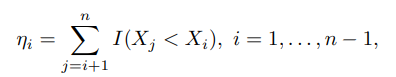

Тогда число инверсий в выборке определяется по формуле

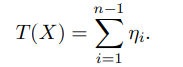

Статистика $T = T(X)$ рассматривается как тестовая статистика, а в качестве критической области выбирается

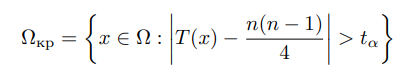

Критическую границу $t_α$ выбирают из условия на уровень значимости

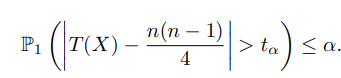

При достаточно больших $n$, можно пользоваться нормальным приближением:

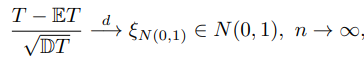

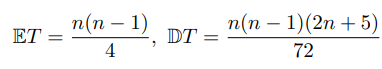

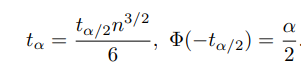

Итак, критерий инверсий в случае больших $n$ выглядит следующим
образом:

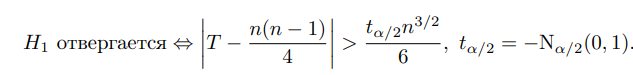

In [280]:
def inversion_test_profit(data, name_company):
    n = len(data)
    inv_count = 0
    for i in range(n - 1):
        for j in range(i + 1, n):
            if data[i] > data[j]:
                inv_count += 1
    expected_inv = (n * (n - 1)) / 4
    alpha = 0.05
    t_alpha = -stats.norm.ppf(alpha/2) * n**(3/2)/6
    
    print(f't_alpha = {t_alpha}')
    if abs(inv_count - expected_inv) >= t_alpha:
        print(f'Гипотеза о случайности доходностей отвергается для компании {name_company}', end = ' ')
        print(abs(inv_count - expected_inv), '>', t_alpha)
    else:
        print(f'Гипотеза о случайности доходностей принимается для компании {name_company}', end = ' ')
        print(abs(inv_count - expected_inv), '<', t_alpha)
    print('----------------------------------------------------------------------------------------------------------------')
    
for company in companies:
    inversion_test_profit(log_profitability_stocks[company], company)


t_alpha = 1283.499965341322
Гипотеза о случайности доходностей принимается для компании BAC 1270.0 < 1283.499965341322
----------------------------------------------------------------------------------------------------------------
t_alpha = 1283.499965341322
Гипотеза о случайности доходностей принимается для компании T 215.0 < 1283.499965341322
----------------------------------------------------------------------------------------------------------------
t_alpha = 1283.499965341322
Гипотеза о случайности доходностей принимается для компании F 753.0 < 1283.499965341322
----------------------------------------------------------------------------------------------------------------
t_alpha = 1283.499965341322
Гипотеза о случайности доходностей принимается для компании SNAP 690.0 < 1283.499965341322
----------------------------------------------------------------------------------------------------------------
t_alpha = 1283.499965341322
Гипотеза о случайности доходностей принимается для

In [281]:
def inversion_test_volume(data, name_company):
    n = len(data)
    inv_count = 0
    for i in range(n - 1):
        for j in range(i + 1, n):
            if data[i] > data[j]:
                inv_count += 1
    expected_inv = (n * (n - 1)) / 4
    alpha = 0.05
    t_alpha = -stats.norm.ppf(alpha/2) * n**(3/2)/6
    
    print(f't_alpha = {t_alpha}')
    if abs(inv_count - expected_inv) >= t_alpha:
        print(f'Гипотеза о случайности объёма продаж отвергается для компании {name_company}', end = ' ')
        print(abs(inv_count - expected_inv), '>', t_alpha)
    else:
        print(f'Гипотеза о случайности объёма продаж принимается для компании {name_company}', end = ' ')
        print(abs(inv_count - expected_inv), '<', t_alpha)
    print('----------------------------------------------------------------------------------------------------------------')

for company in companies:
    inversion_test_volume(stock_data['Volume'][company], company)

t_alpha = 1291.2396506345035
Гипотеза о случайности объёма продаж принимается для компании BAC 924.5 < 1291.2396506345035
----------------------------------------------------------------------------------------------------------------
t_alpha = 1291.2396506345035
Гипотеза о случайности объёма продаж отвергается для компании T 3381.5 > 1291.2396506345035
----------------------------------------------------------------------------------------------------------------
t_alpha = 1291.2396506345035
Гипотеза о случайности объёма продаж принимается для компании F 830.5 < 1291.2396506345035
----------------------------------------------------------------------------------------------------------------
t_alpha = 1291.2396506345035
Гипотеза о случайности объёма продаж принимается для компании SNAP 1260.5 < 1291.2396506345035
----------------------------------------------------------------------------------------------------------------
t_alpha = 1291.2396506345035
Гипотеза о случайности объёма пр

Мы рассматривали акции компаний: Bank of America Corporation Common Stock, AT&T, Ford Motor Company, Snap, Pfizer

По результатам проведённых исследований можно сказать, что гипотеза о случайности принимается для всех компаний по критерий инверсий, что говорит о том, что доходности этих компаний являются случайными значениями. Также были исследованы объёмы продаж этих компаний и только для компании AT&T гипотеза была отвергнута

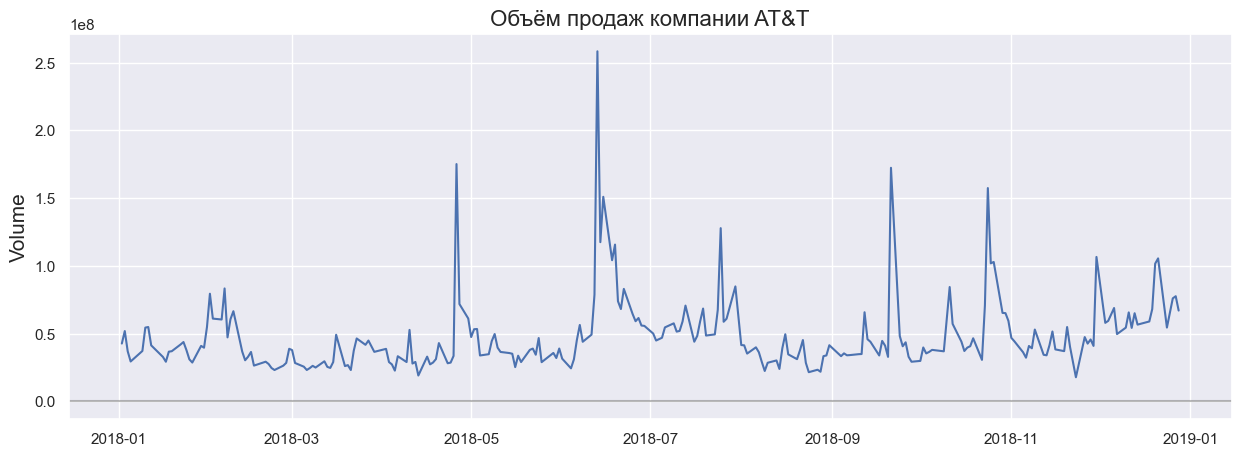

In [282]:
plt.figure(figsize=(15,5))
plt.axhline(y=0, color='k', alpha=0.3)
plt.plot(stock_data['Volume']['T'])

plt.ylabel('Volume', size=15)
plt.title(f"Объём продаж компании AT&T", size=16)
pass

По картинке можно заметить, что скачки продаж происходят примерно с одной периодичностью, что могло повлиять на проверку гипотезы о случайности

### 7. Выберите несколько интересных (значимых)  активов рынка из разных производственных секторов.   В предположении, что наблюдаемые доходности (объемы продаж) являются повторной выборкой из некоторого распределения исследовать (выборочно) распределения доходностей и объемов продаж выбранных активов. Сделать выводы.

Отберём исследуемые компании по коэфициенту Сортино

Будем анализировать компании из трёх секторов: Finance, Health Care, Industrials

Коэффициент Сортино — показатель, позволяющий оценить доходность и риск инвестиционного инструмента, портфеля или стратегии

In [283]:
def sortino_ratio(series, N,rf):
    mean = series.mean() * N -rf
    std_neg = series[series<0].std()*np.sqrt(N)
    return mean/std_neg

N = 250
rf =0.01 
sortinos = log_profitability_stocks.apply(sortino_ratio, args=(N,rf,), axis=0 )
stock_sortino = pd.DataFrame({'Symbol':sortinos.index, 'Sortinos':sortinos.values})
stock_sortino = stock_sortino.merge(data, left_on='Symbol', right_on='Symbol').drop(columns = ['Country', 'Industry','Name'])

list_Industrials = stock_sortino[stock_sortino['Sector'] == 'Industrials'].sort_values('Sortinos')[-10:]
list_Health = stock_sortino[stock_sortino['Sector'] == 'Health Care'].sort_values('Sortinos')[-10:]
list_Finance = stock_sortino[stock_sortino['Sector'] == 'Finance'].sort_values('Sortinos')[-10:]

In [284]:
dict_companies = {
    'finance' : tuple(list_Finance.Symbol),
    'health' : tuple(list_Health.Symbol),
    'industrials' : tuple(list_Industrials.Symbol)
}

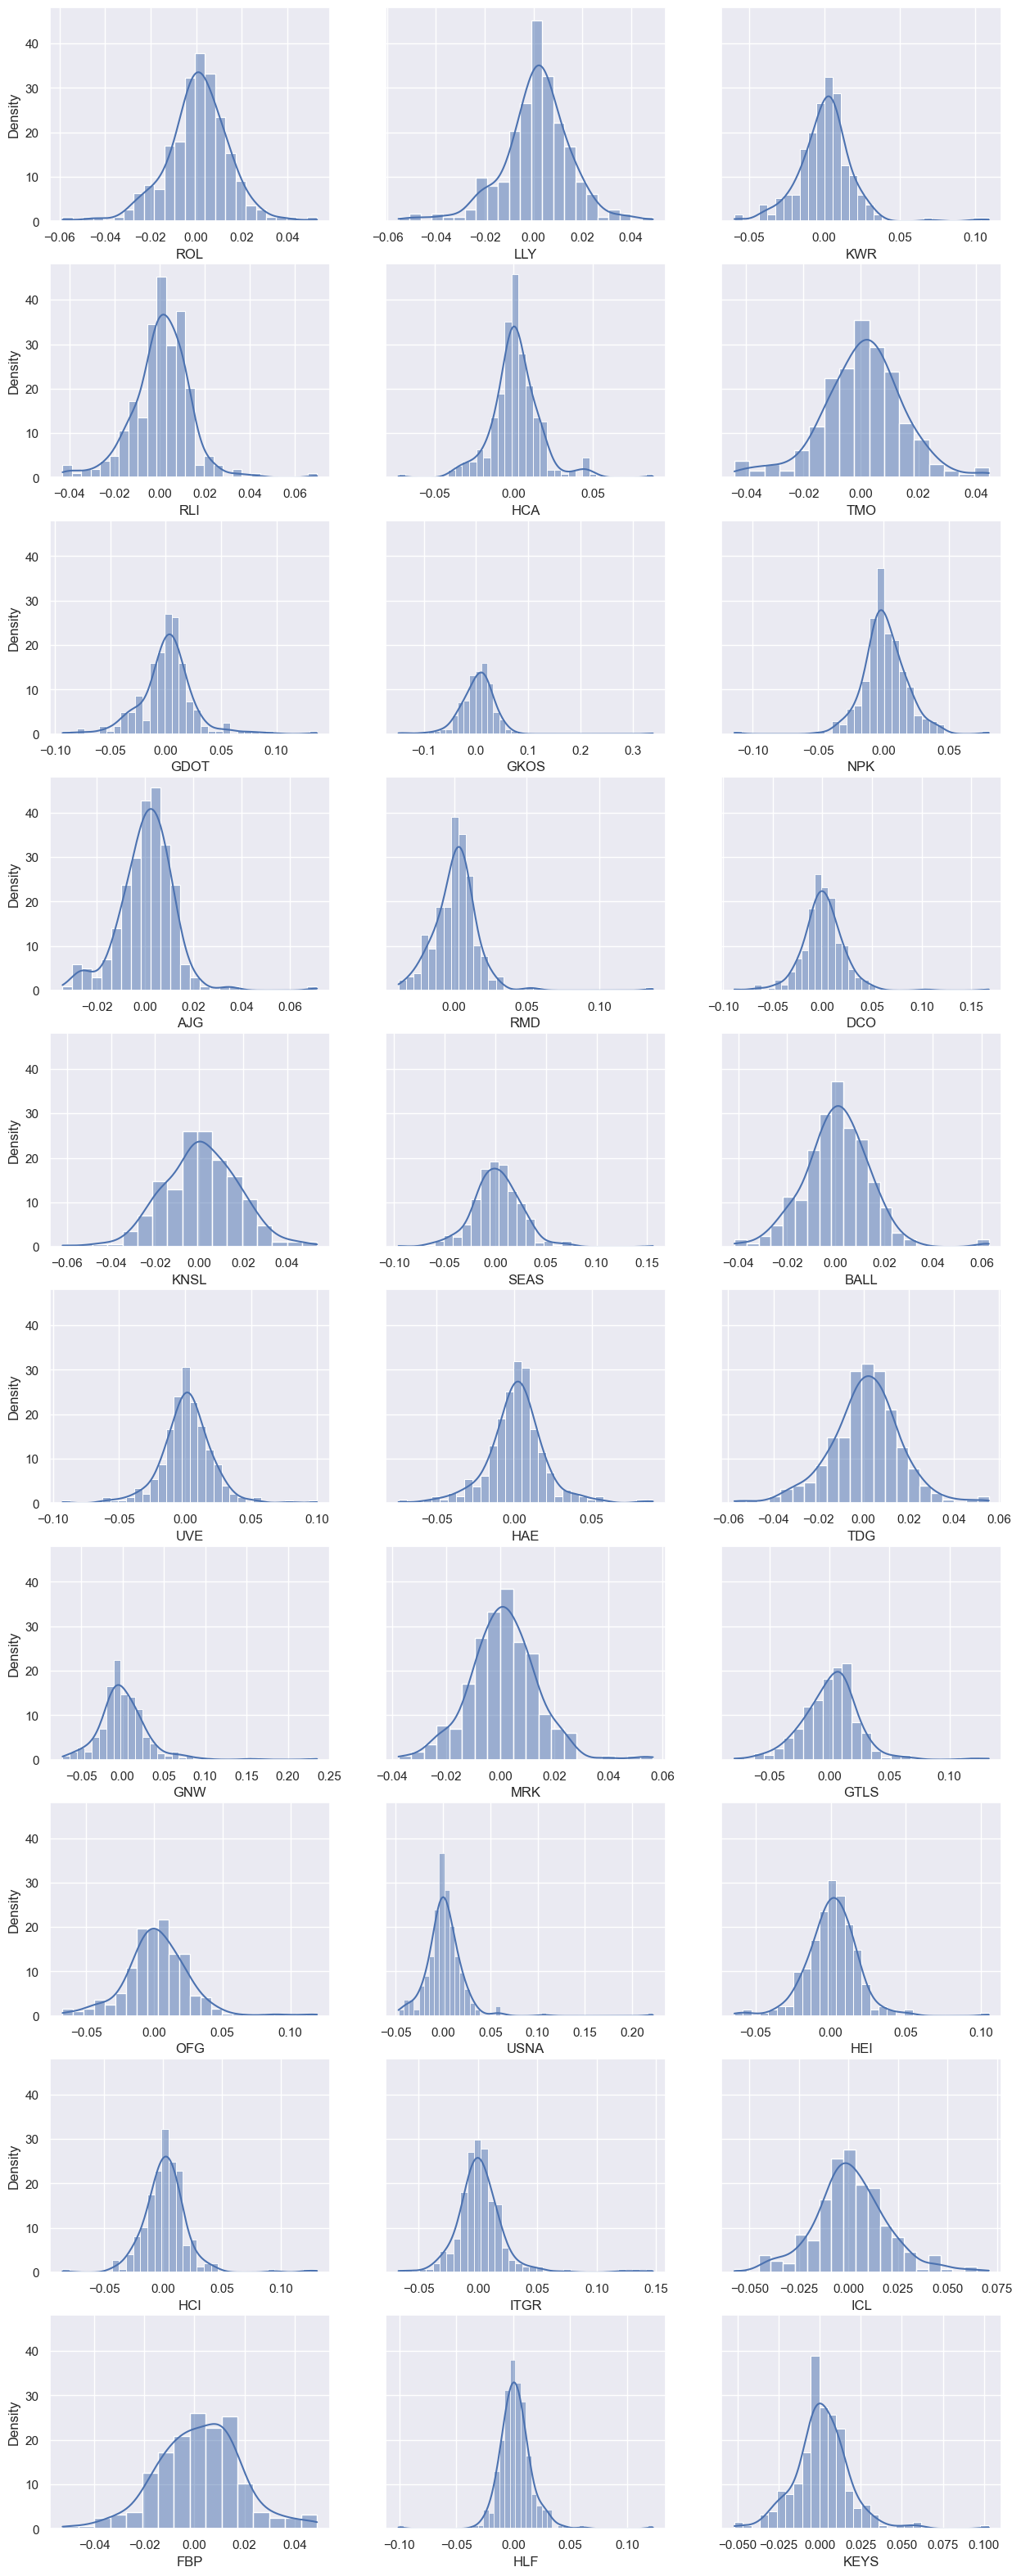

In [285]:
fig, axes = plt.subplots(len(dict_companies['finance']), len(dict_companies), figsize=(15, 40), sharey=True)

for i in range(len(dict_companies)):
    for j in range(len(dict_companies[list(dict_companies.keys())[i]])):
        sector = list(dict_companies.keys())[i]
        sns.histplot(ax=axes[j, i], x=log_profitability_stocks[dict_companies[sector][j]], kde=True, stat='density')
pass

По графикам не совсем понятно, что это за распределение, но оно похоже на нормальное. Проверим это с помощью критерия Пирсона.

In [286]:
def check_normal(company):
    stat, p = stats.normaltest(log_profitability_stocks[company])
    print(f"{company}: Statistics={round(stat, 4)}, p-value={round(p, 4)} |", end=' ')
    alpha = 0.05
    if p > alpha:
        print(f"НЕ отклонять гипотезу о нормальности")
        print(50 * '-')
        return 1
    else:
        print('Отклонить гипотезу о нормальности')
        print(50 * '-')
        return 0

In [287]:
cnt = 0
for sector in dict_companies:
    for company in dict_companies[sector]:
        cnt += check_normal(company)

print(f"Кол-во нормальных распределение среди данных: {cnt}")

ROL: Statistics=21.9556, p-value=0.0 | Отклонить гипотезу о нормальности
--------------------------------------------------
RLI: Statistics=29.6771, p-value=0.0 | Отклонить гипотезу о нормальности
--------------------------------------------------
GDOT: Statistics=46.5803, p-value=0.0 | Отклонить гипотезу о нормальности
--------------------------------------------------
AJG: Statistics=50.1949, p-value=0.0 | Отклонить гипотезу о нормальности
--------------------------------------------------
KNSL: Statistics=3.6788, p-value=0.1589 | НЕ отклонять гипотезу о нормальности
--------------------------------------------------
UVE: Statistics=33.3378, p-value=0.0 | Отклонить гипотезу о нормальности
--------------------------------------------------
GNW: Statistics=154.8241, p-value=0.0 | Отклонить гипотезу о нормальности
--------------------------------------------------
OFG: Statistics=49.7572, p-value=0.0 | Отклонить гипотезу о нормальности
--------------------------------------------------


По результатам проверки тестов на критерий Пирсона, гипотеза о нормальном распределении не отвергается для  `FBP` и `KNSL`. Проведем некий анализ для этих акций.

Обе компании из сектора финансов.

`First BanCorp` - открытая торговая финансовая холдинговая компания, расположенная в Сан-Хуане, Пуэрто-Рико.
Сегодня компания предоставляет финансовые услуги розничным, коммерческим и институциональным клиентам в Пуэрто-Рико, Виргинских островах США, Британских Виргинских островах и Флориде. На 2006 год активы компании составляли более 12.2 миллиарда долларов.

`Kinsale Capital Group, Inc.` – американская страховая компания, которая специализируется на защите клиентов от различных труднореализуемых рисков. Год основания 2009, штаб-квартира: Ричмонд, Вирджиния, США.

In [288]:
norm_companies = ['FBP', 'KNSL'] #'NPK'

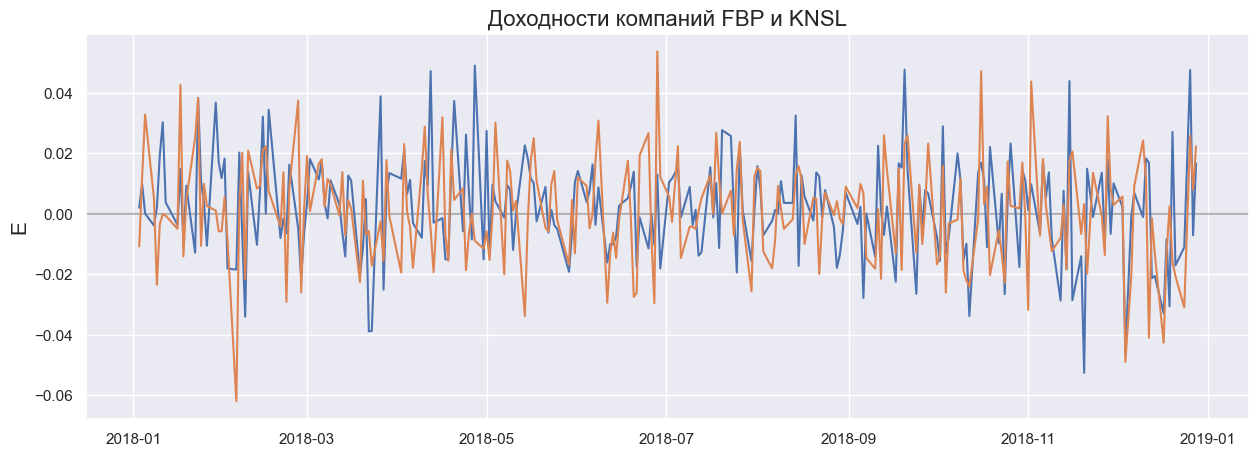

In [289]:
plt.figure(figsize=(15,5))
plt.axhline(y=0, color='k', alpha=0.3)
for name in norm_companies:
    plt.plot(log_profitability_stocks.index, log_profitability_stocks[name])

# plt.xlabel('date', size=15)
plt.ylabel('E', size=15)
plt.title(f"Доходности компаний {norm_companies[0]} и {norm_companies[1]}", size=16)
pass

На графике видно, что обе компании показывают снижение доходности на февраль 2018 года. Это связано с крупнейшим за те годы обвалом американского фондового рынка впервые с 2011 года.

С приходом Дональда Трампа к власти наблюдался рост, который был вызван позитиными новостями и настроениями инвесторов на фоне событий:
Принятия налоговых реформ в законодательстве; Заключения контрактов с разными странами; Положительными результатами отчетов корпораций; Позитивными настроениями на фондовых площадках.

Однако после стабильного роста пришло время для появления падения, и вначале февраля причиной этому стало, по мнению аналитиков, усиление реальных инфляционных ожиданий. Опасения инвесторов вызваны реальным повышением цен, что может еще больше увеличить темпы инфляции. С реакцией на снежную лавину эти события ускорят повышение ставок со стороны Федеральной резервной системы по сравнению с прогнозом, в результате деньги становятся более дорогостоящими для бизнеса

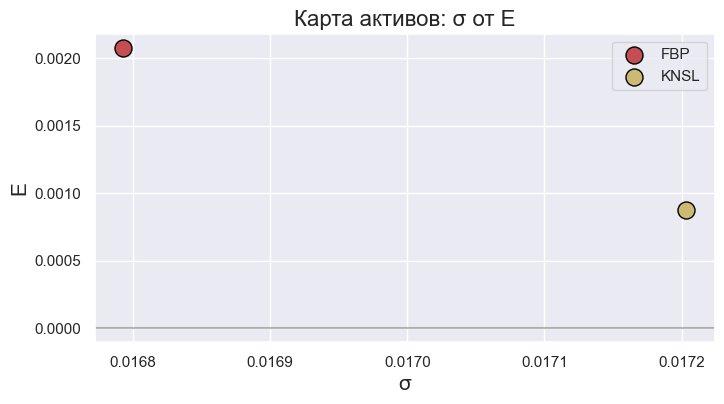

In [290]:
plt.figure(figsize=(8, 4))
plt.axhline(y=0, color='k', alpha=0.3)

plt.scatter(stock_prop.σ[norm_companies[0]], stock_prop.E[norm_companies[0]], s=150, c='r',
            edgecolor='black', label = norm_companies[0])
plt.scatter(stock_prop.σ[norm_companies[1]], stock_prop.E[norm_companies[1]], s=150, c='y',
            edgecolor='black', label = norm_companies[1])

plt.legend(loc = 'upper right')
plt.xlabel('σ', size=15)
plt.ylabel('E', size=15)
plt.title("Карта активов: σ от E", size=16)
pass

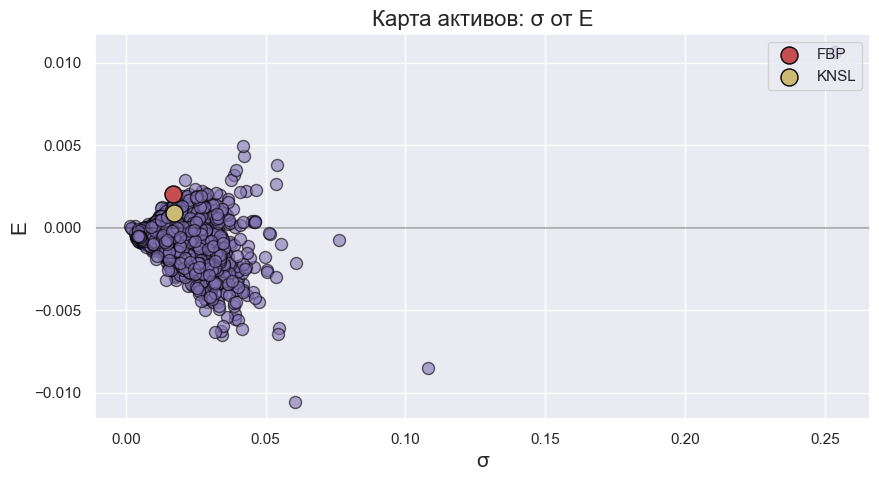

In [291]:
plt.figure(figsize=(10, 5))
plt.axhline(y=0, color='k', alpha=0.3)
plt.scatter(stock_prop['σ'], stock_prop['E'], s=75, c='m',
            edgecolor='black', alpha=0.6)

plt.scatter(stock_prop.σ[norm_companies[0]], stock_prop.E[norm_companies[0]], s=150, c='r',
            edgecolor='black', label = norm_companies[0])
plt.scatter(stock_prop.σ[norm_companies[1]], stock_prop.E[norm_companies[1]], s=150, c='y',
            edgecolor='black', label = norm_companies[1])

plt.legend(loc = 'upper right')

plt.xlabel('σ', size=15)
plt.ylabel('E', size=15)
plt.title("Карта активов: σ от E", size=16)
pass

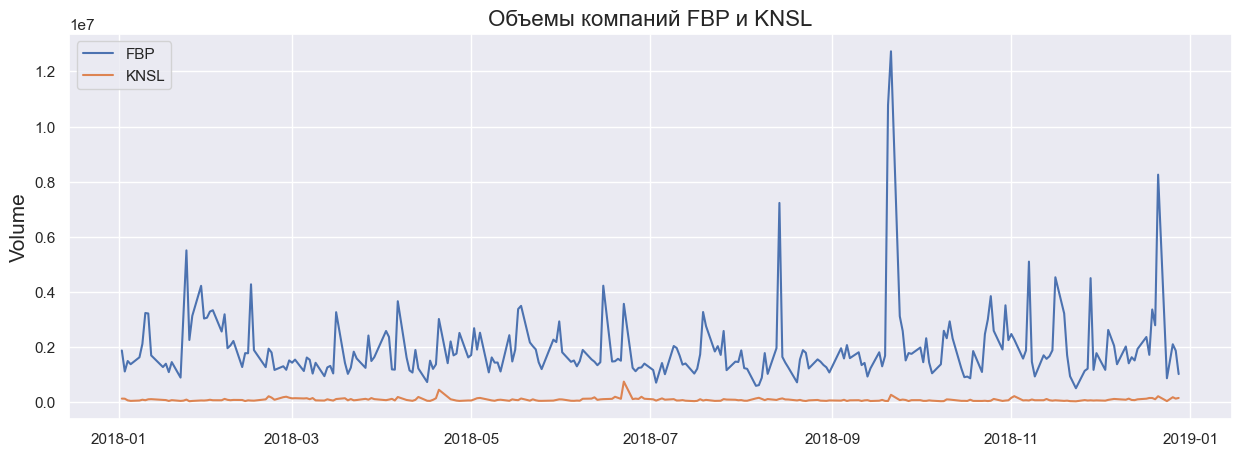

In [292]:
plt.figure(figsize=(15,5))
for name in norm_companies:
    plt.plot(stock_data.index, stock_data.Volume[name], label = name)

plt.legend(loc = 'upper left')
plt.ylabel('Volume', size=15)
plt.title(f"Объемы компаний {norm_companies[0]} и {norm_companies[1]}", size=16)
pass

Объемы компании `KNSL` намного меньше объемов компании `FBP`, однако наблюдаются совпадения тренда в некоторые пиковые моменты.

### FBP

In [293]:
stock_data.Volume['FBP'].sort_values()

Date
2018-11-23      496900
2018-08-06      584100
2018-08-07      609000
2018-07-03      698600
2018-08-20      710000
                ...   
2018-01-24     5502100
2018-08-14     7225700
2018-12-21     8252500
2018-09-20    10776500
2018-09-21    12731600
Name: FBP, Length: 250, dtype: int64

Пики роста <br>
(2018-09-21) Наибольший объем продаж наблюдался в конце сентября. Тогда сильный импульс на фондовых рынках был в первую очередь вызван акциями "голубых фишек" с большой капитализацией, при этом инвесторы не обращали внимания на опасения торговой войны. Сильные фундаментальные показатели экономики США, устойчивый рынок труда и растущая уверенность инвесторов в том, что конфликты, связанные с торговлей, могут оказаться не такими серьезными, как считалось ранее, способствовали росту рынка.

(2018-12-21) Уолл-стрит падала второй день подряд в четверг, поскольку инвесторы по-прежнему обеспокоены тем, что ФРС продолжает количественное ужесточение. Обеспокоенность по поводу частичного закрытия правительства с середины ночи 21 декабря также повлияла на настроения инвесторов. Высокая волатильность фондового рынка существенно подорвала доверие инвесторов к рискованным активам, таким как акции. Все три основных фондовых индекса завершили торги на отрицательной территории.


Пики снижений <br>
(2018-07-03) - Одно из сильных снижений наблюдалось 3го июля, накануне Дня Независимости. Из-за праздника фондовый рынок и рынок облигаций закрылись рано во вторник, 3 июля 2018 года в 13:00 по восточному времени, а рынок облигаций - в 14:00 по восточному времени. Из-за того, что рынки работали далеко не полный свой рабочий день, объем продаж был одним из самых низких для этой компании за год. 

### KNSL

In [294]:
stock_data.Volume['KNSL'].sort_values()

Date
2018-11-23     21700
2018-01-25     24600
2018-10-08     25700
2018-07-16     28200
2018-11-21     28400
               ...  
2018-12-21    206100
2018-11-02    208400
2018-09-21    257900
2018-04-20    440500
2018-06-22    736600
Name: KNSL, Length: 250, dtype: int64

Пики роста <br>
(2018-06-22) Несмотря на то, что рынки закрылись резким снижением в четверг, поскольку торговые опасения между Соединенными Штатами и Китаем в очередной раз повлияли на настроения инвесторов, в данный день у KNSL (как и у FBP) наблюдались наибольшие объемы продаж акций. Рынки были еще более встревожены после того, как решение Верховного суда о налоге с продаж привело к падению акций онлайн-ритейлеров.

Пики снижения <br>
(2018-11-23) Уолл-стрит закрылась в среду в основном ростом, чему способствовало частичное восстановление запасов энергоносителей, которые показали худшие показатели за последнее время. Однако торги были крайне волатильными, поскольку все три основных фондовых индекса потеряли большую часть своей прибыли из-за резкого падения акций Apple.

### Health

In [295]:
dict_companies['health']

('LLY', 'HCA', 'GKOS', 'RMD', 'SEAS', 'HAE', 'MRK', 'USNA', 'ITGR', 'HLF')

In [296]:
health_companies = ['LLY', 'HCA', 'MRK']

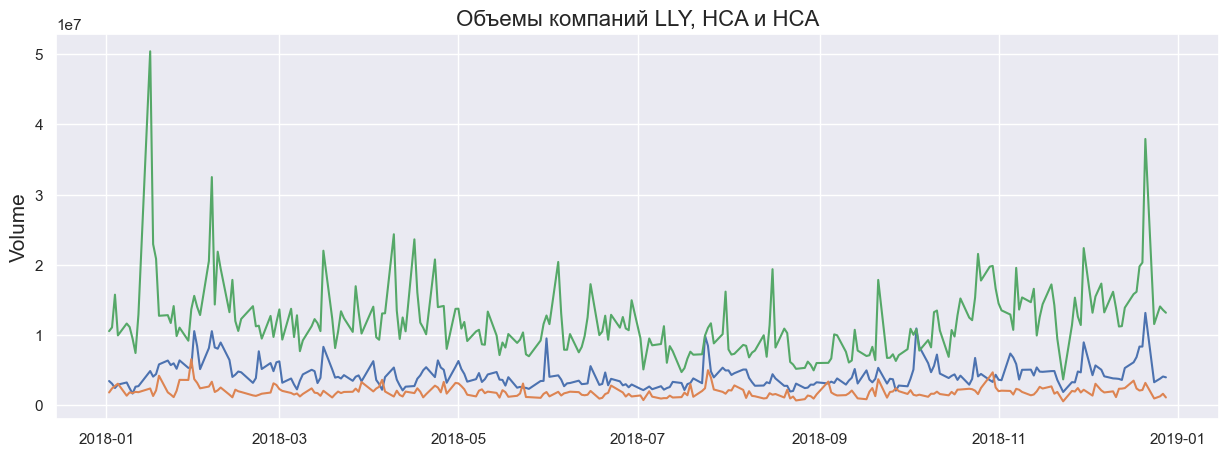

In [297]:
plt.figure(figsize=(15,5))
for name in health_companies:
    plt.plot(stock_data.index, stock_data.Volume[name])

# plt.xlabel('date', size=15)
plt.ylabel('Volume', size=15)
plt.title(f"Объемы компаний {health_companies[0]}, {health_companies[1]} и {health_companies[1]}", size=16)
pass

### Industrials

In [298]:
dict_companies['industrials']

('KWR', 'TMO', 'NPK', 'DCO', 'BALL', 'TDG', 'GTLS', 'HEI', 'ICL', 'KEYS')

In [299]:
industrials_companies = ['TMO', 'BALL', 'TDG']

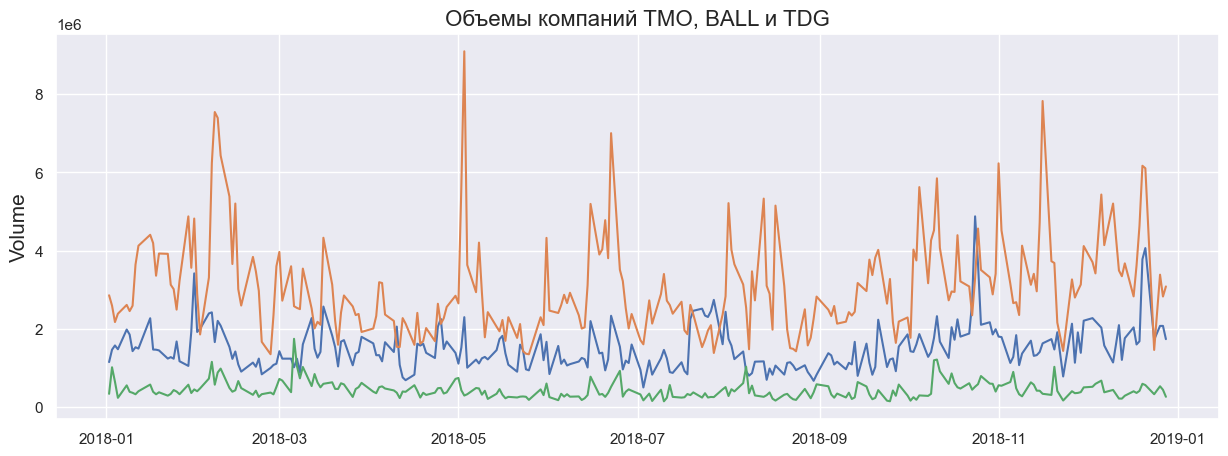

In [300]:
plt.figure(figsize=(15,5))
for name in industrials_companies:
    plt.plot(stock_data.index, stock_data.Volume[name])

# plt.xlabel('date', size=15)
plt.ylabel('Volume', size=15)
plt.title(f"Объемы компаний {industrials_companies[0]}, {industrials_companies[1]} и {industrials_companies[2]}", size=16)
pass

## ВЫВОД:
Во всех рассмотренных сферах можно увидеть для компаний точки соответсвенного роста или падения в определенные периоды. Это может быть связано с разными политическими, финансовыми и другими событиями. Обратим внимание на то, что во всех сферах резкий рост и падение продаж в основном приходятся на один и тот же период времени, что говорит о связи акций компаний внутри одного сектора

# 8. Исследовать зависимости (выборочно) между доходностями различных активов с помощью техники анализа зависимостей. Сделайте анализ зависимостей между парами активов для активов из одного производственного сектора и для активов из разных производственных секторов. Сделайте анализ зависимости (выборочно) между доходностями и объемами продаж одного актива. Рассмотрите активы из разных производственных секторов. 

Для анализа зависимостей акций построим для каждого сектора матрицу корреляций

In [301]:
stock_data_sectors = pd.DataFrame({'Symbol':stock_data['Volume'].columns, 'Mean_volume':stock_data['Volume'].mean().values})
stock_data_sectors = stock_data_sectors.merge(data, left_on='Symbol', right_on='Symbol').drop(columns = ['Country', 'Industry','Name'])

In [302]:
list_Industrials = stock_data_sectors[stock_data_sectors['Sector'] == 'Industrials'].sort_values('Mean_volume')[-10:]
list_Health = stock_data_sectors[stock_data_sectors['Sector'] == 'Health Care'].sort_values('Mean_volume')[-10:]
list_Finance = stock_data_sectors[stock_data_sectors['Sector'] == 'Finance'].sort_values('Mean_volume')[-10:]

dict_companies_sector = {
    'finance' : tuple(list_Finance.Symbol),
    'health' : tuple(list_Health.Symbol),
    'industrials' : tuple(list_Industrials.Symbol)
}

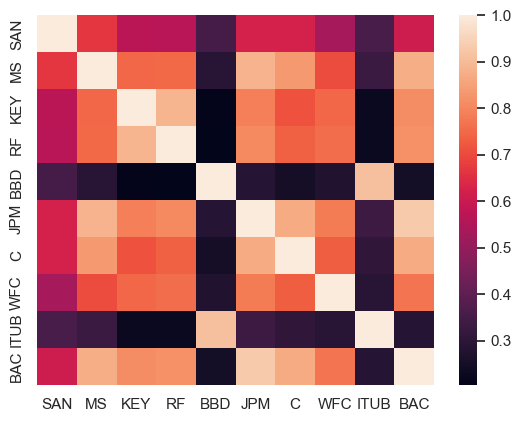

In [303]:
corr = log_profitability_stocks[list(dict_companies_sector['finance'])].corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
pass

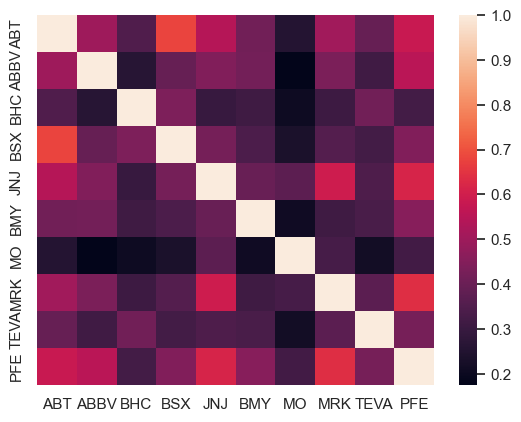

In [304]:
corr = log_profitability_stocks[list(dict_companies_sector['health'])].corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
pass

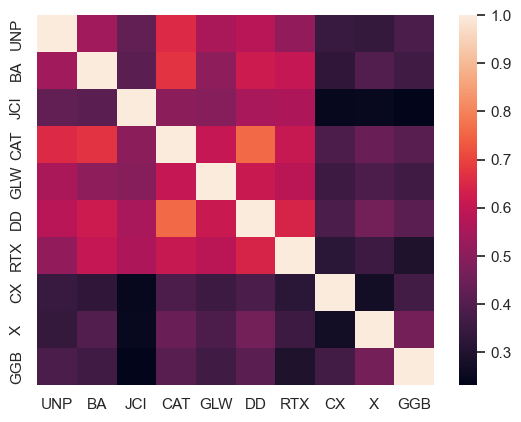

In [305]:
corr = log_profitability_stocks[list(dict_companies_sector['industrials'])].corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
pass

### Finance

In [306]:
list_Industrials = stock_data_sectors[stock_data_sectors['Sector'] == 'Industrials'].sort_values('Mean_volume')
list_Health = stock_data_sectors[stock_data_sectors['Sector'] == 'Health Care'].sort_values('Mean_volume')
list_Finance = stock_data_sectors[stock_data_sectors['Sector'] == 'Finance'].sort_values('Mean_volume')

print(f"Industials: {len(list_Industrials)}")
print(f"Health: {len(list_Health)}")
print(f"Finance: {len(list_Finance)}")

Industials: 235
Health: 84
Finance: 546


In [307]:
size = 100

list_Industrials = stock_data_sectors[stock_data_sectors['Sector'] == 'Industrials'].sort_values('Mean_volume') #[:size]
list_Health = stock_data_sectors[stock_data_sectors['Sector'] == 'Health Care'].sort_values('Mean_volume') #[:size]
list_Finance = stock_data_sectors[stock_data_sectors['Sector'] == 'Finance'].sort_values('Mean_volume') #[:size]

dict_companies_sector = {
    'finance' : tuple(list_Finance.Symbol),
    'health' : tuple(list_Health.Symbol),
    'industrials' : tuple(list_Industrials.Symbol)
}

dict_percent_results = {}

def corr_def(sector):
    corr_level = 0.5

    more_corr_level = np.where(log_profitability_stocks[list(dict_companies_sector[sector])].corr() > corr_level)
    len_more_corr_level = len(more_corr_level[0])
    len_comp = len(list(dict_companies_sector[sector]))
    count_pairs = len_comp * len_comp - len_comp
    corr_pairs = len_more_corr_level - len_comp

    print('-' * 65)
    print('SECTOR :', sector)
    print(f"Count pairs: {count_pairs}, Count corr pairs: {corr_pairs}, Percent: {round(corr_pairs/count_pairs*100, 4)}%")
    display(log_profitability_stocks[list(dict_companies_sector[sector])].corr() > corr_level)

    dict_percent_results[sector] = round(corr_pairs/count_pairs*100, 4)
    return corr_pairs, count_pairs

sectors_corr_pairs = 0
sectors_count_pairs = 0
for sector in dict_companies_sector:
    corr_pairs, count_pairs = corr_def(sector)
    sectors_corr_pairs += corr_pairs
    sectors_count_pairs += count_pairs

print(f"Sum corr pairs in sectors: {sectors_corr_pairs}, Sum count pairs in sectors: {sectors_count_pairs}")

-----------------------------------------------------------------
SECTOR : finance
Count pairs: 297570, Count corr pairs: 22378, Percent: 7.5202%


,GJP,GJR,GJO,GJT,JBK,GJH,KTH,KTN,BHV,NOM,...,SAN,MS,KEY,RF,BBD,JPM,C,WFC,ITUB,BAC
GJP,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
GJR,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
GJO,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
GJT,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
JBK,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JPM,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,False,True
C,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,False,True
WFC,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,False,True
ITUB,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


-----------------------------------------------------------------
SECTOR : health
Count pairs: 6972, Count corr pairs: 438, Percent: 6.2823%


,CCM,SNDA,TARO,USPH,CHE,USNA,ENZ,MSA,CNMD,FMS,...,ABT,ABBV,BHC,BSX,JNJ,BMY,MO,MRK,TEVA,PFE
CCM,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SNDA,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TARO,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
USPH,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CHE,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BMY,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
MO,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
MRK,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,True,False,True
TEVA,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


-----------------------------------------------------------------
SECTOR : industrials
Count pairs: 54990, Count corr pairs: 7096, Percent: 12.9042%


,EFXT,TFII,CPAC,CGA,SPLP,VHI,JHX,TGLS,MPX,GHM,...,UNP,BA,JCI,CAT,GLW,DD,RTX,CX,X,GGB
EFXT,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TFII,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CPAC,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CGA,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SPLP,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DD,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
RTX,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
CX,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
X,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


Sum corr pairs in sectors: 29912, Sum count pairs in sectors: 359532


In [308]:
list_Industrials = stock_data_sectors[stock_data_sectors['Sector'] == 'Industrials'].sort_values('Mean_volume')
list_Health = stock_data_sectors[stock_data_sectors['Sector'] == 'Health Care'].sort_values('Mean_volume')
list_Finance = stock_data_sectors[stock_data_sectors['Sector'] == 'Finance'].sort_values('Mean_volume')

list_all_sectors = list(list_Industrials.Symbol) + list(list_Health.Symbol) + list(list_Finance.Symbol)

dict_companies_all_sectors = {
    'sector' : tuple(list_all_sectors)
}

def corr_def(sector):
    corr_level = 0.5

    more_corr_level = np.where(log_profitability_stocks[list(dict_companies_all_sectors[sector])].corr() > corr_level)
    len_more_corr_level = len(more_corr_level[0])
    len_comp = len(list(dict_companies_all_sectors[sector]))
    count_pairs = len_comp * len_comp - len_comp
    corr_pairs = len_more_corr_level - len_comp

    print('-' * 65)
    print('SECTOR :', sector)
    print(f"Count pairs: {count_pairs}, Count corr pairs: {corr_pairs}, Percent: {round(corr_pairs/count_pairs*100, 4)}%")
    display(log_profitability_stocks[list(dict_companies_all_sectors[sector])].corr() > corr_level)

    return corr_pairs, count_pairs

all_corr_pairs, count_pairs = corr_def('sector')

print(f" Corr pairs without corr in sectors: {all_corr_pairs - sectors_corr_pairs}, \
       Percent: {round((all_corr_pairs - sectors_corr_pairs)/(count_pairs-sectors_count_pairs)*100, 4)}%")

dict_percent_results['all_sectors'] = round((all_corr_pairs - sectors_corr_pairs)/(count_pairs-sectors_count_pairs)*100, 4)

-----------------------------------------------------------------
SECTOR : sector
Count pairs: 747360, Count corr pairs: 47122, Percent: 6.3051%


,EFXT,TFII,CPAC,CGA,SPLP,VHI,JHX,TGLS,MPX,GHM,...,SAN,MS,KEY,RF,BBD,JPM,C,WFC,ITUB,BAC
EFXT,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TFII,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CPAC,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CGA,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SPLP,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JPM,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,False,True
C,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,False,True
WFC,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,False,True
ITUB,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


 Corr pairs without corr in sectors: 17210,        Percent: 4.4375%


In [309]:
dict_percent_results

{'finance': 7.5202,
 'health': 6.2823,
 'industrials': 12.9042,
 'all_sectors': 4.4375}

Отметим, что процент коррелируемых акций внутри одного сектора выше, чем процент коррелируемых акций между компаниями их разных секторов

Это подтверждает факт о том, что компании одного сектора больше связаны друг с другом, нежели компании из разных секторов. Но мы должны заметить, что процент коррелируемых акций в компаниях из разных секторов не слишком маленький. Это говорит о том, что между разными секторами также есть некоторые зависимости. Например, очевидна связь между компаниями из секторов Industrials и Finance, так как промышленные компании в целом имеют большое влияние на весь рынок и на сферу финансов в частности, так как с ней идёт очень тесное взаимодействие

In [310]:
pd = log_profitability_stocks[list(dict_companies_sector['industrials'])].corr().unstack().sort_values()
lens = len(list(dict_companies_sector['industrials'])) - 1

In [311]:
pd[:-lens].tail(11)

NOC   LMT     0.808563
LMT   NOC     0.808563
CAT   DE      0.810103
DE    CAT     0.810103
IEX   AME     0.812310
AME   IEX     0.812310
VMC   MLM     0.817532
MLM   VMC     0.817532
RS    NUE     0.819251
NUE   RS      0.819251
EFXT  EFXT    1.000000
dtype: float64

Наибольшая корреляция наблюдается между компаниями `NUE` и `RS`, `MLM` и `VMC`.

### `NUE` и `RS`

In [312]:
corr_companies = ['NUE', 'RS']

Nucor Corporation — американская сталелитейная компания, крупнейшая в США и 11-я в мире на 2017 год. В списке крупнейших публичных компаний мира Forbes Global 2000 за 2018 год U.S. Steel заняла 615-е место. Наряду с Commercial Metals Company, это один из двух основных поставщиков арматуры, используемой для армирования бетона в зданиях, мостах, дорогах и инфраструктуре в США.

Компания Reliance Steel and Aluminum Co. (RSAC) со штаб-квартирой в Скоттсдейле, Аризона, является крупнейшим оператором центров обслуживания металлов в Северной Америке. Компания предоставляет услуги по обработке металлов и поставляет линейку из примерно 100 000 металлических изделий, включая алюминий, латунь, сплавы, медь, углеродистую сталь, нержавеющую сталь, титан и специальные металлические изделия 125 000 клиентам, таким как производители.

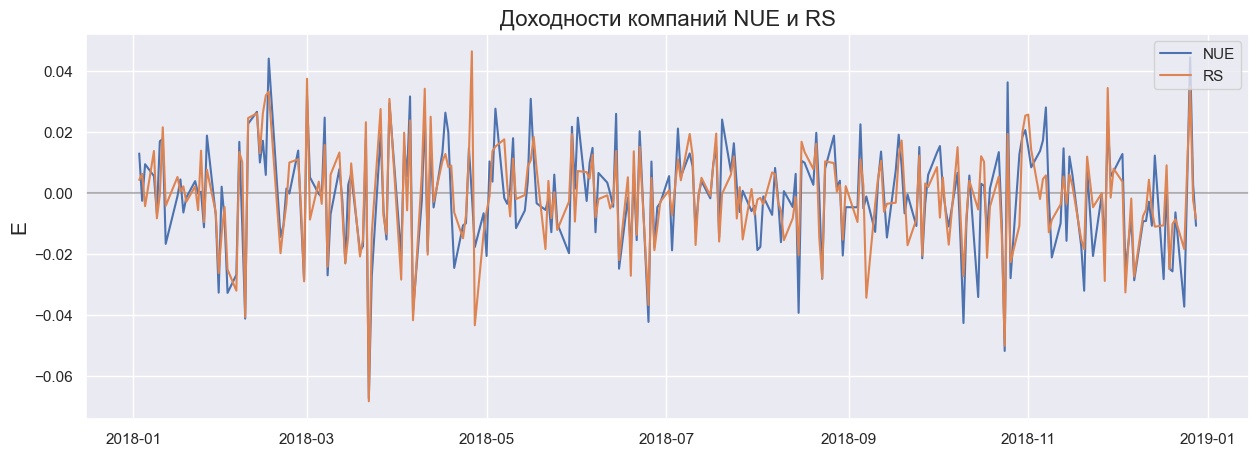

In [313]:
plt.figure(figsize=(15,5))
plt.axhline(y=0, color='k', alpha=0.3)
for name in corr_companies:
    plt.plot(log_profitability_stocks.index, log_profitability_stocks[name], label = name)

plt.legend(loc = 'upper right')    
plt.ylabel('E', size=15)
plt.title(f"Доходности компаний {corr_companies[0]} и {corr_companies[1]}", size=16)
pass

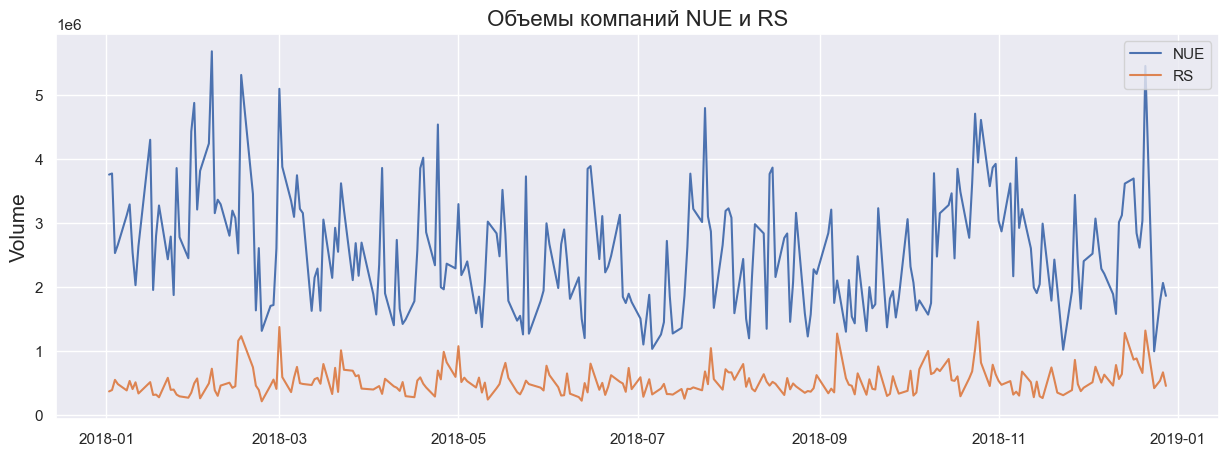

In [314]:
plt.figure(figsize=(15,5))
for name in corr_companies:
    plt.plot(stock_data.index, stock_data.Volume[name], label = name)

plt.legend(loc = 'upper right')     
plt.ylabel('Volume', size=15)
plt.title(f"Объемы компаний {corr_companies[0]} и {corr_companies[1]}", size=16)
pass

По графику объему продаж делаем, видно, что объемы у данных компаний имеют существенное различие по абсолютной величине, однако в целом объемы похожи по своим основным тенденциям роста или спада, то есть компании имели примерно одинаковый прирост в продажах в процентном соотношении относительно предыдущего периода каждой компании.

Эту же мысль передает и график доходности компаний: обе компании имеют выраженные периоды прироста или спада показателя доходности, однако во многом данные периоды совпадают.

Это объясняется тем, что данные компании из похожих сфер, так что различные события влияют на них в похожих отношениях.

### `MLM` и `VMC`

In [315]:
corr_companies = ['MLM', 'VMC']

Martin Marietta Materials, Inc. - американская компания, поставляющая заполнители и тяжелые строительные материалы, ее деятельность охватывает 26 штатов, Канаду и Карибский бассейн. В частности, Martin Marietta Materials поставляет ресурсы для строительства дорог, тротуаров и фундаментов.

Vulcan Materials Company (NYSE: VMC) - американская компания, базирующаяся в Бирмингеме, Алабама. В основном занимается производством, дистрибуцией и продажей строительных материалов. Vulcan - крупнейший производитель строительных материалов, в первую очередь гравия, щебня и песка, в нем занято около 12 000 человек на более чем 400 предприятиях. Vulcan обслуживает 22 штата, округ Колумбия, Мексику, Канаду, Багамские острова и Виргинские острова США.

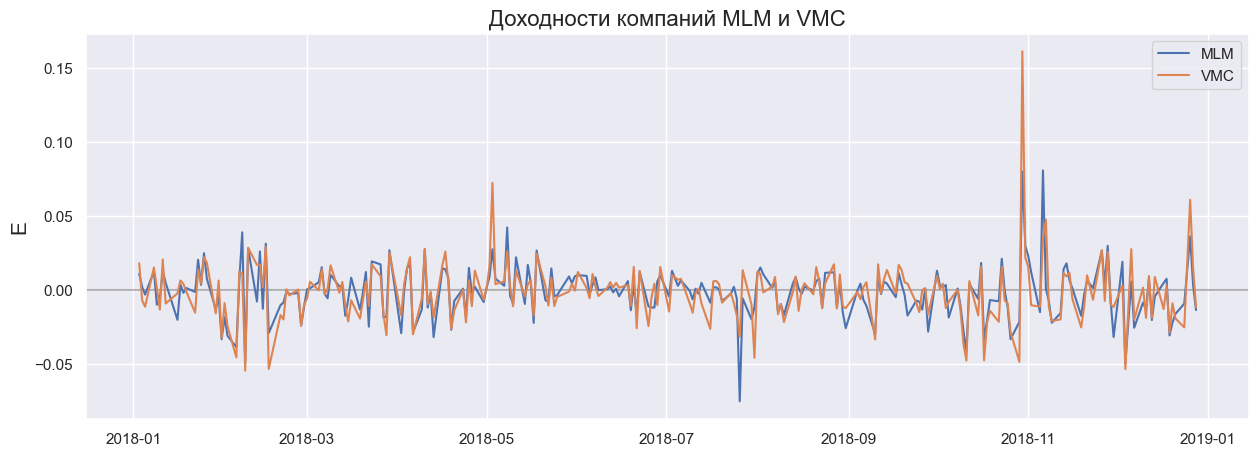

In [316]:
plt.figure(figsize=(15,5))
plt.axhline(y=0, color='k', alpha=0.3)
for name in corr_companies:
    plt.plot(log_profitability_stocks.index, log_profitability_stocks[name], label = name)

plt.legend(loc = 'upper right')     
plt.ylabel('E', size=15)
plt.title(f"Доходности компаний {corr_companies[0]} и {corr_companies[1]}", size=16)
pass

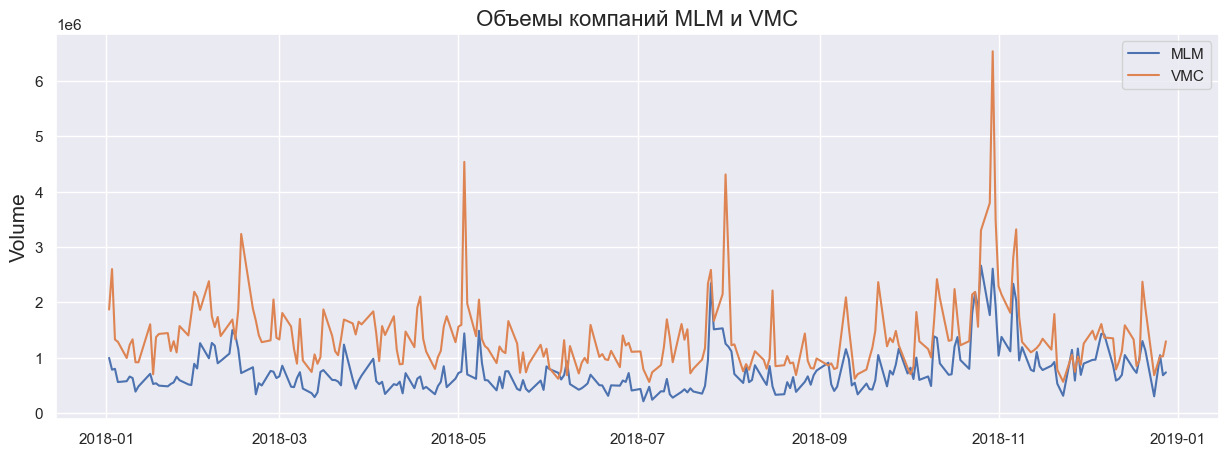

In [317]:
plt.figure(figsize=(15,5))
for name in corr_companies:
    plt.plot(stock_data.index, stock_data.Volume[name], label = name)

plt.legend(loc = 'upper right')     
plt.ylabel('Volume', size=15)
plt.title(f"Объемы компаний {corr_companies[0]} и {corr_companies[1]}", size=16)
pass

Для данных компаний мы тоже видим большую корреляцию по обоим графикам, что говорит об их зависимости (что логично изходя из числовых показателей и того факта, что они из одной сферы).